In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r'/content/walmart (1).csv')
print(data.head(10))
print()
print('tail: ',  data.tail(10))

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   
5      1  12-03-2010    1439541.59             0        57.79       2.667   
6      1  19-03-2010    1472515.79             0        54.58       2.720   
7      1  26-03-2010    1404429.92             0        51.45       2.732   
8      1  02-04-2010    1594968.28             0        62.27       2.719   
9      1  09-04-2010    1545418.53             0        65.86       2.770   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4 

In [ ]:
# converting date to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [ ]:
# aggregate data at the store level
store_sales = data.groupby('Store').agg(
    {
        'Weekly_Sales': 'sum',
        'CPI': 'mean',
        'Unemployment': 'mean',
        'Fuel_Price': 'mean',
    }
).reset_index()

In [ ]:
# printing group of similar store value together
store_sales.groupby('Store').groups

{1: [0], 2: [1], 3: [2], 4: [3], 5: [4], 6: [5], 7: [6], 8: [7], 9: [8], 10: [9], 11: [10], 12: [11], 13: [12], 14: [13], 15: [14], 16: [15], 17: [16], 18: [17], 19: [18], 20: [19], 21: [20], 22: [21], 23: [22], 24: [23], 25: [24], 26: [25], 27: [26], 28: [27], 29: [28], 30: [29], 31: [30], 32: [31], 33: [32], 34: [33], 35: [34], 36: [35], 37: [36], 38: [37], 39: [38], 40: [39], 41: [40], 42: [41], 43: [42], 44: [43], 45: [44]}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
"""store_sales_scaled is the standardized dataset,
meaning all features (Weekly Sales, CPI, Fuel Price, etc.)
are scaled to have mean=0 and variance=1 (important for PCA)"""

scaler = StandardScaler()
features = ["Weekly_Sales","CPI","Fuel_Price","Unemployment"]
store_sales_scaled= scaler.fit_transform(store_sales[features])

store_sales.head()
# Data is converted into standardized dataset, meaning all the features are scaled to have mean=0 & variance=1

,Store,Weekly_Sales,CPI,Unemployment,Fuel_Price
0,1,2.224028e+08,215.996892,7.610420,3.219699
1,2,2.753824e+08,215.646311,7.623846,3.219699
2,3,5.758674e+07,219.391531,7.176986,3.219699
3,4,2.995440e+08,128.679669,5.964692,3.216972
4,5,4.547569e+07,216.565581,6.295406,3.219699


In [ ]:
#Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
pca_results = pca.fit_transform(store_sales_scaled)
store_sales['PC1'] = pca_results[:, 0]
store_sales['PC2'] = pca_results[:, 1]

# Converts multiple features into just two while preserving most of the information.
#PC1 & PC2 are uncorrelated
# Helps in K-Means clustering, as stores are now grouped based on PC1 and PC2 rather than many original variables.
#

        PC1       PC2
0 -1.354537  0.697348
1 -1.321225  1.324105
2 -1.598401 -1.181753
3 -0.441414  2.300353
4 -1.797465 -1.133763


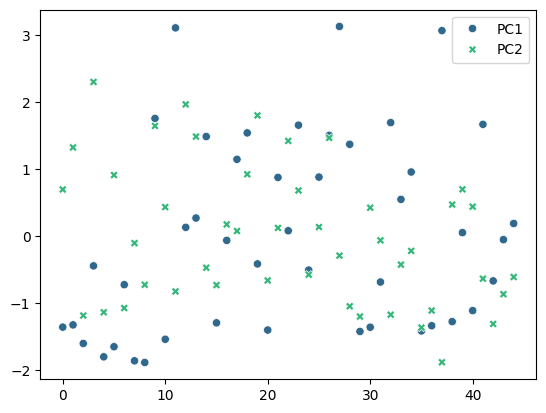

In [ ]:
import pandas as pd

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(store_sales, columns=["PC1", "PC2"])
print(pca_df.head())
sns.scatterplot(pca_df, palette="viridis")
plt.show()


In [ ]:
# Apply KMeans clustering
distortation=[]
k=range(2,10)

for i in k:
    kmean_model=KMeans(n_clusters= i ,max_iter=25)
    kmean_model.fit(store_sales[['PC1','PC2']])
    distortation.append(kmean_model.inertia_)

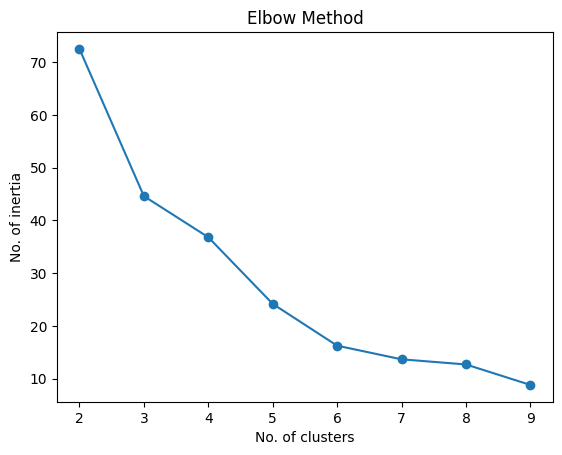

In [ ]:
plt.plot(k,distortation,'o-')
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('No. of inertia')
plt.show()

In [ ]:
# Apply KMeans with Optimal K(K=3 from above graph)
cluster_model = KMeans(n_clusters = 3)
cluster_model.fit(store_sales[['PC1','PC2']])

KMeans(n_clusters=3)

In [ ]:
centroids = cluster_model.cluster_centers_
centroids

array([[-1.1759854 , -0.44239697],
       [ 0.28238526,  1.38297188],
       [ 1.66072734, -0.45556571]])

In [ ]:
cluster_model.labels_

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2,
       1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0,
       0], dtype=int32)

In [ ]:
store_sales['Cluster'] = cluster_model.predict(store_sales[['PC1','PC2']])

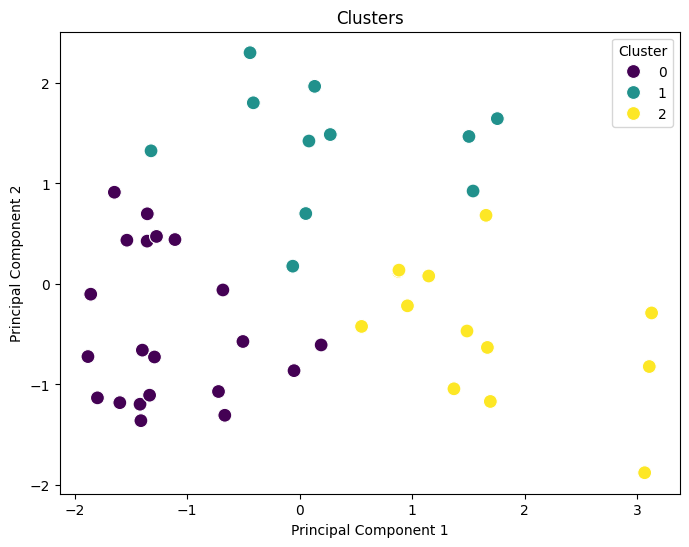

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(store_sales, x="PC1", y="PC2", hue=store_sales['Cluster'], palette="viridis", s=100)
plt.title("Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
cluster_summary = store_sales.groupby("Cluster")[features].mean()
print(cluster_summary)

         Weekly_Sales         CPI  Fuel_Price  Unemployment
Cluster                                                    
0        1.194172e+08  205.975533    3.245138      7.469073
1        2.407594e+08  151.816173    3.405470      7.010266
2        1.216235e+08  132.735663    3.502249      9.692180


In [ ]:
print(store_sales.groupby("Cluster").mean())

             Store  Weekly_Sales         CPI  Unemployment  Fuel_Price  \
Cluster                                                                  
0        23.333333  1.194172e+08  205.975533      7.469073    3.245138   
1        17.181818  2.407594e+08  151.816173      7.010266    3.405470   
2        27.384615  1.216235e+08  132.735663      9.692180    3.502249   

              PC1       PC2  
Cluster                      
0       -1.175985 -0.442397  
1        0.282385  1.382972  
2        1.660727 -0.455566  


In [ ]:
cluster_counts = store_sales["Cluster"].value_counts()
print(cluster_counts)

Cluster
0    21
2    13
1    11
Name: count, dtype: int64


<ipython-input-154-b81d5d9771d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=store_sales["Cluster"], y=store_sales["Weekly_Sales"], palette="viridis")


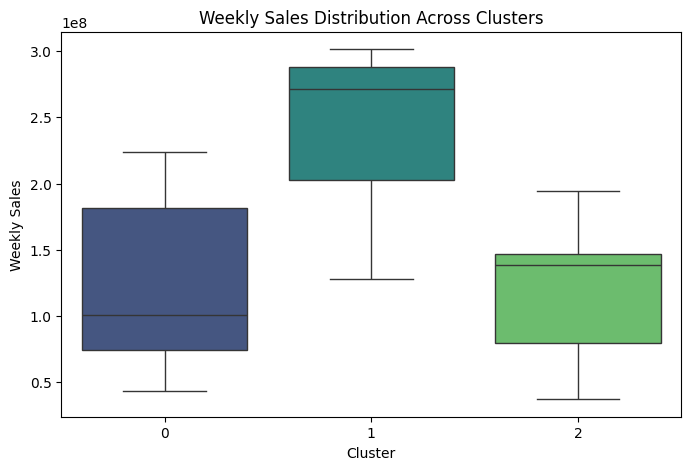

,Weekly_Sales,Fuel_Price,CPI,Unemployment
Cluster,,,,
0,1.194172e+08,3.245138,205.975533,7.469073
1,2.407594e+08,3.405470,151.816173,7.010266
2,1.216235e+08,3.502249,132.735663,9.692180


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=store_sales["Cluster"], y=store_sales["Weekly_Sales"], palette="viridis")
plt.title("Weekly Sales Distribution Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Weekly Sales")
plt.show()

cluster_summary = store_sales.groupby("Cluster")[["Weekly_Sales", "Fuel_Price", "CPI", "Unemployment"]].mean()
cluster_summary


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


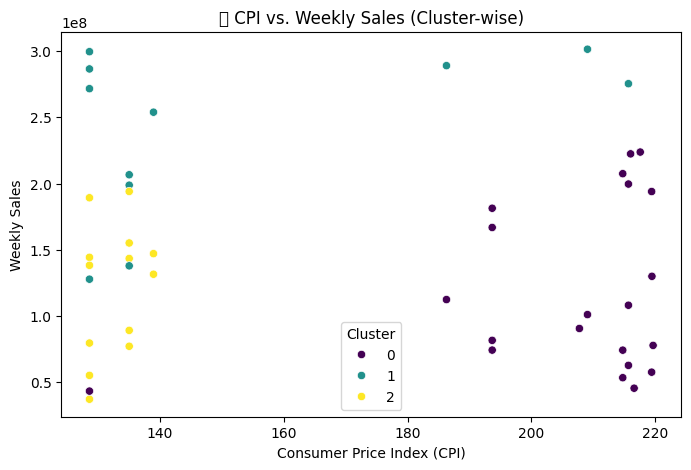

In [ ]:
#Cluster wise CPI vs Weekly Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=store_sales["CPI"], y=store_sales["Weekly_Sales"], hue=store_sales["Cluster"], palette="viridis")
plt.title("💰 CPI vs. Weekly Sales (Cluster-wise)")
plt.xlabel("Consumer Price Index (CPI)")
plt.ylabel("Weekly Sales")
plt.show()

# High CPI impacts sale negatively

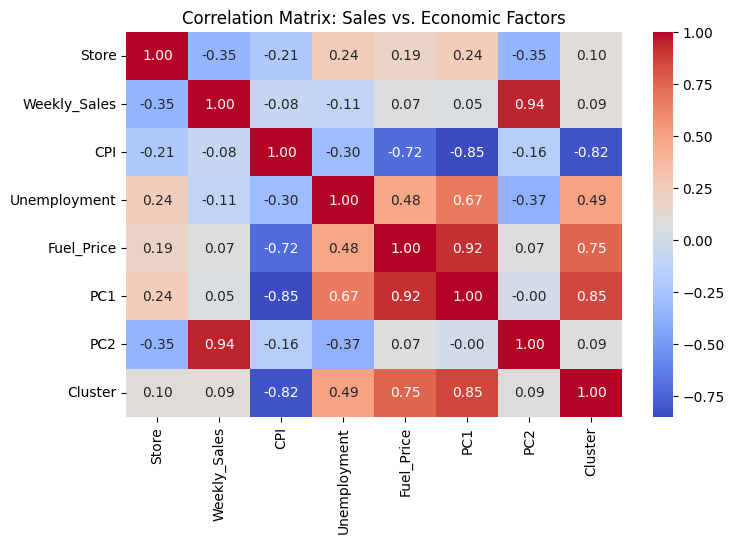

In [ ]:
# Compute correlation matrix
correlation_matrix = store_sales.corr()

# Visualize correlations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Sales vs. Economic Factors")
plt.show()


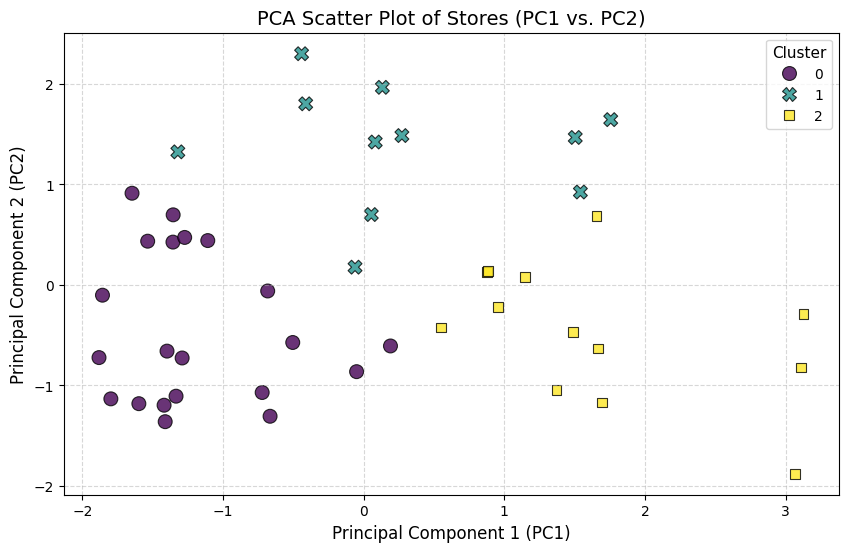

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PCA results to DataFrame (if not already done)
pca_df = store_sales[["PC1", "PC2", "Cluster"]]  # Include cluster for color coding

# Set figure size
plt.figure(figsize=(10, 6))

# Create scatter plot with clusters
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="Cluster",  # Color points based on cluster
    palette="viridis",
    style="Cluster",  # Different markers for clusters
    edgecolor="black",  # Black border for better visibility
    s=100,  # Increase point size
    alpha=0.8  # Adjust transparency
)

# Add title and labels
plt.title("PCA Scatter Plot of Stores (PC1 vs. PC2)", fontsize=14)
plt.xlabel("Principal Component 1 (PC1)", fontsize=12)
plt.ylabel("Principal Component 2 (PC2)", fontsize=12)
plt.legend(title="Cluster", fontsize=10, title_fontsize=11)
plt.grid(True, linestyle="--", alpha=0.5)  # Add grid for better readability

# Show plot
plt.show()


In [ ]:
import pandas as pd
import scipy.stats as stats

# Assuming 'data' is your dataset and contains 'Store', 'Weekly_Sales', and 'Cluster' columns
# If not, replace column names with the actual ones in your dataset

# Group sales by clusters
cluster_groups = [group["Weekly_Sales"].values for _, group in store_sales.groupby("Cluster")]

# Perform one-way ANOVA test
f_stat, p_value = stats.f_oneway(*cluster_groups)

# Display results
print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"ANOVA p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in sales between clusters (p < 0.05).")
else:
    print("No significant difference in sales between clusters (p >= 0.05).")


ANOVA F-statistic: 17.1134
ANOVA p-value: 0.0000
There is a significant difference in sales between clusters (p < 0.05).


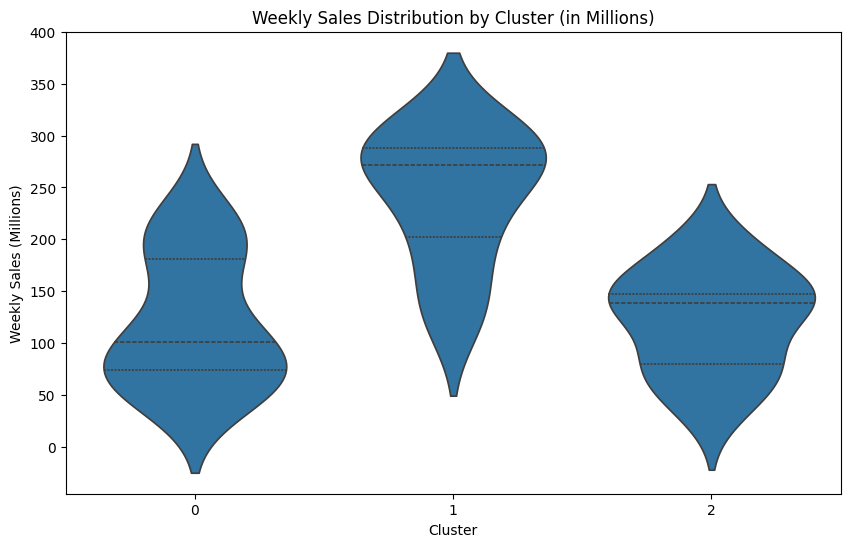

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x="Cluster", y=store_sales["Weekly_Sales"] / 1e6, data=store_sales, inner="quartile")
plt.title("Weekly Sales Distribution by Cluster (in Millions)")
plt.xlabel("Cluster")
plt.ylabel("Weekly Sales (Millions)")
plt.show()


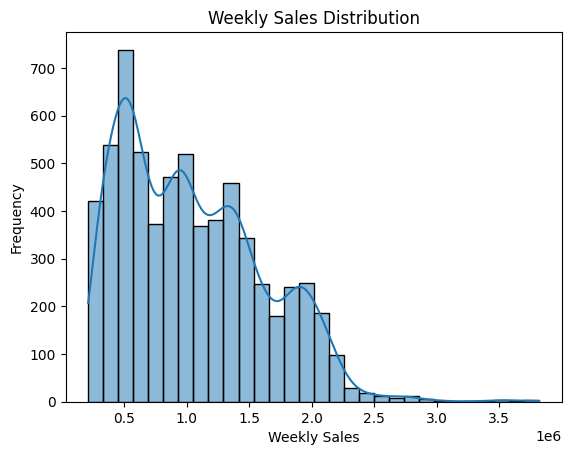

In [ ]:
#Sales distribution per store
sns.histplot(data["Weekly_Sales"], bins=30, kde=True)
plt.title("Weekly Sales Distribution")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()


In [ ]:
import pandas as pd

# Assuming 'store_sales' contains 'Store' and 'Cluster' columns
cluster_mapping = store_sales.groupby("Cluster")["Store"].unique()

# Display stores in each cluster
for cluster, stores in cluster_mapping.items():
    print(f"Cluster {cluster}: {list(stores)}")


Cluster 0: [1, 3, 5, 6, 7, 8, 9, 11, 16, 21, 25, 30, 31, 32, 36, 37, 39, 41, 43, 44, 45]
Cluster 1: [2, 4, 10, 13, 14, 17, 19, 20, 23, 27, 40]
Cluster 2: [12, 15, 18, 22, 24, 26, 28, 29, 33, 34, 35, 38, 42]


<ipython-input-171-6c5a2738852a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="Weekly Sales (in M)", data=cluster_summary, ax=axes[0, 0], palette="Blues")
<ipython-input-171-6c5a2738852a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="CPI", data=cluster_summary, ax=axes[0, 1], palette="Greens")
<ipython-input-171-6c5a2738852a>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cluster", y="Unemployment", data=cluster_summary, ax=axes[1, 0], palette="Reds")
<ipython-input-171-6c5a2738852a>:33: FutureWa

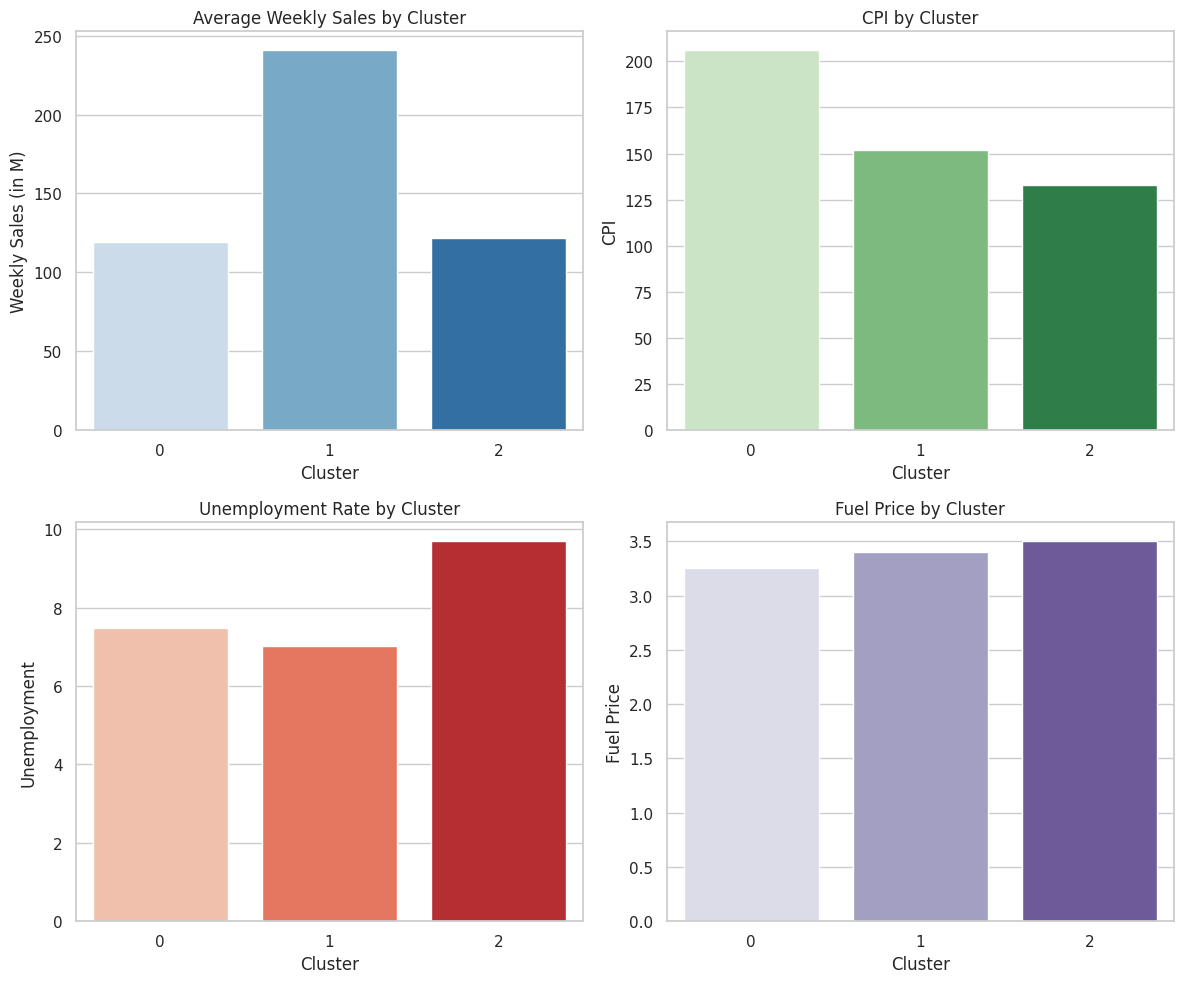

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a DataFrame for visualization
cluster_summary = pd.DataFrame({
    "Cluster": [0, 1, 2],
    "Weekly Sales (in M)": [119.4, 240.7, 121.6],
    "CPI": [205.97, 151.81, 132.73],
    "Unemployment": [7.47, 7.01, 9.69],
    "Fuel Price": [3.25, 3.40, 3.50]
})

# Setting the style for better visuals
sns.set(style="whitegrid")

# Creating subplots for a better breakdown
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Weekly Sales Visualization
sns.barplot(x="Cluster", y="Weekly Sales (in M)", data=cluster_summary, ax=axes[0, 0], palette="Blues")
axes[0, 0].set_title("Average Weekly Sales by Cluster")

# CPI Visualization
sns.barplot(x="Cluster", y="CPI", data=cluster_summary, ax=axes[0, 1], palette="Greens")
axes[0, 1].set_title("CPI by Cluster")

# Unemployment Rate Visualization
sns.barplot(x="Cluster", y="Unemployment", data=cluster_summary, ax=axes[1, 0], palette="Reds")
axes[1, 0].set_title("Unemployment Rate by Cluster")

# Fuel Price Visualization
sns.barplot(x="Cluster", y="Fuel Price", data=cluster_summary, ax=axes[1, 1], palette="Purples")
axes[1, 1].set_title("Fuel Price by Cluster")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
